# Halpha Emitters S-PLUS

In [1]:
import numpy as np
import pandas as pd
import glob
from astropy.table import Table
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import hdbscan
import matplotlib.pyplot as plt
from itertools import combinations
import umap
import seaborn as sns; sns.set()
sns.set_theme(style="ticks")

/home/luisangel/luis-env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Open the CSV files
# Define the pattern to match CSV files
pattern = '../Ha-emitters/*PerField.csv'

# Use glob to find all CSV files in the current directory
csv_files = glob.glob(pattern)

# Create an empty list to store DataFrames
dfs = []

In [3]:
# Loop through each CSV file and read it into a DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

In [4]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
combined_df

,Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,...,J0410_psf,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf
0,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0001534',151.228065,-24.565881,2768.8430,1194.1807,0.000344,1.109519,7.119020e-06,2.708475,...,16.869030,0.045,16.612030,0.040,15.790031,0.034,14.886657,0.028,14.564144,0.031
1,b'HYDRA-0021',b'iDR4_3_HYDRA-0021_0019499',151.820602,-25.619486,1653.6090,3400.8994,0.000307,1.081890,2.490490e-05,2.232373,...,13.345949,0.016,13.265827,0.014,13.113828,0.012,13.033432,0.020,13.019970,0.019
2,b'HYDRA-0023',b'iDR4_3_HYDRA-0023_0021195',154.612704,-25.530006,3569.1528,3993.6829,0.000317,0.949352,1.283758e-05,2.532320,...,15.504150,0.011,15.336150,0.009,14.717150,0.007,14.074205,0.016,NaN,NaN
3,b'HYDRA-0026',b'iDR4_3_HYDRA-0026_0046098',158.459389,-24.620632,8485.7730,9943.1000,0.000367,1.218677,7.749229e-06,2.742691,...,NaN,NaN,NaN,NaN,15.129318,0.027,NaN,NaN,NaN,NaN
4,b'HYDRA-0031',b'iDR4_3_HYDRA-0031_0032774',150.917736,-26.667847,9368.1560,5633.4710,0.000384,1.078957,7.585842e-06,2.917582,...,15.852819,0.022,15.775820,0.015,15.204820,0.023,15.071949,0.020,15.141534,0.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,b'STRIPE82-0157',b'iDR4_3_STRIPE82-0157_0016873',349.808612,-0.962720,7268.3916,3780.7950,0.000391,1.049551,8.169368e-07,3.894912,...,NaN,NaN,NaN,NaN,20.401480,0.137,18.918780,0.100,18.550900,0.059
3660,b'STRIPE82-0158',b'iDR4_3_STRIPE82-0158_0009177',350.254869,0.323001,4347.6445,3032.8470,0.000335,0.986151,6.768905e-07,4.712428,...,19.580069,0.111,19.594069,0.104,19.548069,0.088,18.961864,0.039,19.223470,0.122
3661,b'STRIPE82-0162',b'iDR4_3_STRIPE82-0162_0018498',352.418578,0.670626,8739.1020,5308.4004,0.000349,1.035019,6.068673e-07,3.826304,...,NaN,NaN,NaN,NaN,20.593569,0.147,17.811909,0.155,18.467216,0.062
3662,b'STRIPE82-0163',b'iDR4_3_STRIPE82-0163_0014886',354.578466,-0.927664,3879.0051,4010.2715,0.000404,1.171372,4.901620e-07,4.799046,...,NaN,NaN,NaN,NaN,20.541643,0.192,19.062990,0.052,18.447079,0.067


In [5]:
for columns in combined_df.columns:
    print(columns)

Field
ID
RA
DEC
X
Y
FWHM
FWHM_n
ISOarea
KRON_RADIUS
MU_MAX_INST
PETRO_RADIUS
SEX_FLAGS_DET
SEX_NUMBER_DET
CLASS_STAR
s2n_DET_PStotal
THETA
ELLIPTICITY
ELONGATION
FLUX_RADIUS_20
FLUX_RADIUS_50
FLUX_RADIUS_70
FLUX_RADIUS_90
s2n_r_PStotal
s2n_J0660_PStotal
s2n_i_PStotal
FWHM_r
FWHM_n_r
FWHM_J0660
FWHM_n_J0660
FWHM_i
FWHM_n_i
SEX_FLAGS_r
SEX_FLAGS_J0660
SEX_FLAGS_i
CLASS_STAR_r
CLASS_STAR_J0660
CLASS_STAR_i
r_PStotal
e_r_PStotal
g_PStotal
e_g_PStotal
i_PStotal
e_i_PStotal
u_PStotal
e_u_PStotal
z_PStotal
e_z_PStotal
J0378_PStotal
e_J0378_PStotal
J0395_PStotal
e_J0395_PStotal
J0410_PStotal
e_J0410_PStotal
J0430_PStotal
e_J0430_PStotal
J0515_PStotal
e_J0515_PStotal
J0660_PStotal
e_J0660_PStotal
J0861_PStotal
e_J0861_PStotal
r_psf
e_r_psf
g_psf
e_g_psf
i_psf
e_i_psf
u_psf
e_u_psf
z_psf
e_z_psf
J0378_psf
e_J0378_psf
J0395_psf
e_J0395_psf
J0410_psf
e_J0410_psf
J0430_psf
e_J0430_psf
J0515_psf
e_J0515_psf
J0660_psf
e_J0660_psf
J0861_psf
e_J0861_psf


In [6]:
# Cleaned error

m_err = (combined_df["e_r_PStotal"] <= 0.2) & (combined_df["e_g_PStotal"] <= 0.2) & \
        (combined_df["e_i_PStotal"] <= 0.2) & (combined_df["e_u_PStotal"] <= 0.2) & \
        (combined_df["e_J0378_PStotal"] <= 0.2) & (combined_df["e_J0395_PStotal"] <= 0.2) & \
        (combined_df["e_J0410_PStotal"] <= 0.2) & (combined_df["e_J0430_PStotal"] <= 0.2) & \
        (combined_df["e_J0515_PStotal"] <= 0.2) & (combined_df["e_J0660_PStotal"] <= 0.2) & \
        (combined_df["e_J0861_PStotal"] <= 0.2) & (combined_df["e_z_PStotal"] <= 0.2)

m_depth = (combined_df["g_PStotal"] <= 19.6) & (combined_df["u_PStotal"] <= 19.6) & \
        (combined_df["J0378_PStotal"] <= 19.0) & (combined_df["J0395_PStotal"] <= 18.5) & \
        (combined_df["J0410_PStotal"] <= 18.6) & (combined_df["J0430_PStotal"] <= 18.6) & \
        (combined_df["J0515_PStotal"] <= 18.8) & (combined_df["J0861_PStotal"] <= 18.3) & \
        (combined_df["z_PStotal"] <= 18.5)

mask_total = m_err & m_depth

In [7]:
df_cleanErr = combined_df[mask_total]
len(df_cleanErr)

992

In [8]:
#Selecting columns
columns = ["r_PStotal",
"g_PStotal",
"i_PStotal",
"u_PStotal",
"z_PStotal",
"J0378_PStotal",
"J0395_PStotal",
"J0410_PStotal",
"J0430_PStotal",
"J0515_PStotal",
"J0660_PStotal",
"J0861_PStotal"]

In [9]:
df_mag = df_cleanErr[columns]
df_mag

,r_PStotal,g_PStotal,i_PStotal,u_PStotal,z_PStotal,J0378_PStotal,J0395_PStotal,J0410_PStotal,J0430_PStotal,J0515_PStotal,J0660_PStotal,J0861_PStotal
0,15.220734,16.171457,14.812934,18.507275,14.589712,17.930260,17.468056,16.697994,16.477058,15.688791,14.816056,14.486720
1,13.060103,13.233669,13.076601,14.610666,13.112734,13.971252,13.690886,13.328466,13.250656,13.034685,12.990587,12.979302
2,14.198063,14.808924,14.000414,16.387249,13.904016,16.096981,15.934842,15.441872,15.274127,14.653158,14.003431,13.810323
3,14.722768,15.341463,14.474484,17.200853,14.391745,16.875017,16.729393,16.043348,15.896696,15.205017,14.518179,14.313604
4,15.091292,15.484464,15.128340,16.868654,15.073277,16.484432,16.317368,15.829420,15.745643,15.084617,15.035774,15.058778
...,...,...,...,...,...,...,...,...,...,...,...,...
2620,18.000395,18.302813,17.773294,17.637398,17.536915,17.587162,17.922178,18.272415,18.287457,18.356531,17.307950,17.577490
2621,17.866158,18.214617,17.809431,18.400927,17.782034,18.234266,18.397488,18.323847,18.240858,18.162941,17.636140,17.834671
2623,17.523035,17.775160,17.287622,17.910520,17.314465,17.895935,18.199877,18.181738,17.635970,17.626886,17.161116,17.373093
2624,17.738972,17.951134,17.755970,18.054686,17.268883,17.808826,17.979656,17.897880,17.804268,17.953829,17.440863,16.889874


### Creating the colors 

In [10]:
# Generate all combinations of magnitude columns
color_index_pairs = list(combinations(df_mag, 2))
len(color_index_pairs)

66

In [11]:
def calculate_earnings(df, index_pairs):
    for index_pair in index_pairs:
        color_index_name = f"{index_pair[0]} - {index_pair[1]}"
        df.loc[:, color_index_name] = df[index_pair[0]] - df[index_pair[1]]
    return df

In [12]:
df_colors_mag = calculate_earnings(df_mag, color_index_pairs)

/tmp/ipykernel_1550512/262842159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, color_index_name] = df[index_pair[0]] - df[index_pair[1]]
/tmp/ipykernel_1550512/262842159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, color_index_name] = df[index_pair[0]] - df[index_pair[1]]
/tmp/ipykernel_1550512/262842159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [13]:
df_colors_mag

,r_PStotal,g_PStotal,i_PStotal,u_PStotal,z_PStotal,J0378_PStotal,J0395_PStotal,J0410_PStotal,J0430_PStotal,J0515_PStotal,...,J0410_PStotal - J0430_PStotal,J0410_PStotal - J0515_PStotal,J0410_PStotal - J0660_PStotal,J0410_PStotal - J0861_PStotal,J0430_PStotal - J0515_PStotal,J0430_PStotal - J0660_PStotal,J0430_PStotal - J0861_PStotal,J0515_PStotal - J0660_PStotal,J0515_PStotal - J0861_PStotal,J0660_PStotal - J0861_PStotal
0,15.220734,16.171457,14.812934,18.507275,14.589712,17.930260,17.468056,16.697994,16.477058,15.688791,...,0.220936,1.009203,1.881938,2.211274,0.788267,1.661002,1.990338,0.872735,1.202071,0.329336
1,13.060103,13.233669,13.076601,14.610666,13.112734,13.971252,13.690886,13.328466,13.250656,13.034685,...,0.077810,0.293781,0.337879,0.349164,0.215971,0.260069,0.271354,0.044098,0.055383,0.011285
2,14.198063,14.808924,14.000414,16.387249,13.904016,16.096981,15.934842,15.441872,15.274127,14.653158,...,0.167745,0.788714,1.438441,1.631549,0.620969,1.270696,1.463804,0.649727,0.842835,0.193108
3,14.722768,15.341463,14.474484,17.200853,14.391745,16.875017,16.729393,16.043348,15.896696,15.205017,...,0.146652,0.838331,1.525169,1.729744,0.691679,1.378517,1.583092,0.686838,0.891413,0.204575
4,15.091292,15.484464,15.128340,16.868654,15.073277,16.484432,16.317368,15.829420,15.745643,15.084617,...,0.083777,0.744803,0.793646,0.770642,0.661026,0.709869,0.686865,0.048843,0.025839,-0.023004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,18.000395,18.302813,17.773294,17.637398,17.536915,17.587162,17.922178,18.272415,18.287457,18.356531,...,-0.015042,-0.084116,0.964465,0.694925,-0.069074,0.979507,0.709967,1.048581,0.779041,-0.269540
2621,17.866158,18.214617,17.809431,18.400927,17.782034,18.234266,18.397488,18.323847,18.240858,18.162941,...,0.082989,0.160906,0.687707,0.489176,0.077917,0.604718,0.406187,0.526801,0.328270,-0.198531
2623,17.523035,17.775160,17.287622,17.910520,17.314465,17.895935,18.199877,18.181738,17.635970,17.626886,...,0.545768,0.554852,1.020622,0.808645,0.009084,0.474854,0.262877,0.465770,0.253793,-0.211977
2624,17.738972,17.951134,17.755970,18.054686,17.268883,17.808826,17.979656,17.897880,17.804268,17.953829,...,0.093612,-0.055949,0.457017,1.008006,-0.149561,0.363405,0.914394,0.512966,1.063955,0.550989


In [14]:
# Drop magniytudes
df_colors = df_colors_mag.drop(columns=columns)

In [15]:
df_colors

,r_PStotal - g_PStotal,r_PStotal - i_PStotal,r_PStotal - u_PStotal,r_PStotal - z_PStotal,r_PStotal - J0378_PStotal,r_PStotal - J0395_PStotal,r_PStotal - J0410_PStotal,r_PStotal - J0430_PStotal,r_PStotal - J0515_PStotal,r_PStotal - J0660_PStotal,...,J0410_PStotal - J0430_PStotal,J0410_PStotal - J0515_PStotal,J0410_PStotal - J0660_PStotal,J0410_PStotal - J0861_PStotal,J0430_PStotal - J0515_PStotal,J0430_PStotal - J0660_PStotal,J0430_PStotal - J0861_PStotal,J0515_PStotal - J0660_PStotal,J0515_PStotal - J0861_PStotal,J0660_PStotal - J0861_PStotal
0,-0.950723,0.407800,-3.286541,0.631022,-2.709526,-2.247322,-1.477260,-1.256324,-0.468057,0.404678,...,0.220936,1.009203,1.881938,2.211274,0.788267,1.661002,1.990338,0.872735,1.202071,0.329336
1,-0.173566,-0.016498,-1.550563,-0.052631,-0.911149,-0.630783,-0.268363,-0.190553,0.025418,0.069516,...,0.077810,0.293781,0.337879,0.349164,0.215971,0.260069,0.271354,0.044098,0.055383,0.011285
2,-0.610861,0.197649,-2.189186,0.294047,-1.898918,-1.736779,-1.243809,-1.076064,-0.455095,0.194632,...,0.167745,0.788714,1.438441,1.631549,0.620969,1.270696,1.463804,0.649727,0.842835,0.193108
3,-0.618695,0.248284,-2.478085,0.331023,-2.152249,-2.006625,-1.320580,-1.173928,-0.482249,0.204589,...,0.146652,0.838331,1.525169,1.729744,0.691679,1.378517,1.583092,0.686838,0.891413,0.204575
4,-0.393172,-0.037048,-1.777362,0.018015,-1.393140,-1.226076,-0.738128,-0.654351,0.006675,0.055518,...,0.083777,0.744803,0.793646,0.770642,0.661026,0.709869,0.686865,0.048843,0.025839,-0.023004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,-0.302418,0.227101,0.362997,0.463480,0.413233,0.078217,-0.272020,-0.287062,-0.356136,0.692445,...,-0.015042,-0.084116,0.964465,0.694925,-0.069074,0.979507,0.709967,1.048581,0.779041,-0.269540
2621,-0.348459,0.056727,-0.534769,0.084124,-0.368108,-0.531330,-0.457689,-0.374700,-0.296783,0.230018,...,0.082989,0.160906,0.687707,0.489176,0.077917,0.604718,0.406187,0.526801,0.328270,-0.198531
2623,-0.252125,0.235413,-0.387485,0.208570,-0.372900,-0.676842,-0.658703,-0.112935,-0.103851,0.361919,...,0.545768,0.554852,1.020622,0.808645,0.009084,0.474854,0.262877,0.465770,0.253793,-0.211977
2624,-0.212162,-0.016998,-0.315714,0.470089,-0.069854,-0.240684,-0.158908,-0.065296,-0.214857,0.298109,...,0.093612,-0.055949,0.457017,1.008006,-0.149561,0.363405,0.914394,0.512966,1.063955,0.550989


# Reduction dimensionality

## UMAP 

Given that there are 66 variables, we use UMAP. I think UMAP is the best option because these variables are probably not linearly correlated. [UMAP](https://umap-learn.readthedocs.io/en/latest/) (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique commonly used for visualizing high-dimensional data in lower-dimensional spaces. If you have 66 variables and suspect they are not linearly correlated, UMAP could be a suitable method for exploring the structure of your data in a lower-dimensional space while preserving non-linear relationships. However, the effectiveness of UMAP depends on various factors, including the nature of your data and the specific goals of your analysis. It's always a good idea to experiment with different techniques and evaluate their performance based on your data and objectives.

In [16]:
# Standarized the data
X_stand = StandardScaler().fit_transform(df_colors)

#### Try cross-validation 

To perform cross-validation for choosing the optimal number of components in UMAP.

In [17]:
# Split data into training and validation sets
X_train, X_val = train_test_split(X_stand, test_size=0.2, random_state=42)

In [18]:
# Define a range of number of components to try
num_components_range = [2, 3, 4, 5, 10, 20, 50]

best_num_components = None
best_silhouette_score = -1  # Initialize with a low value

In [19]:
# Loop over different numbers of components
for num_components in num_components_range:
    # Fit UMAP model
    reducer_ = umap.UMAP(n_neighbors=100, n_components=num_components, random_state=42)
    X_train_trans = reducer_.fit_transform(X_train)
    
    # Cluster the transformed data using KMeans
    kmeans = KMeans(n_clusters=num_components, random_state=42)
    labels = kmeans.fit_predict(X_train_trans)
    
    # Evaluate performance on validation set using Silhouette Score
    silhouette = silhouette_score(X_train_trans, labels, random_state=42)
    print(f"Number of components: {num_components}, Silhouette Score: {silhouette}")
    
    # Update best number of components and labels if necessary
    if silhouette > best_silhouette_score:
        best_silhouette_score = silhouette
        best_num_components = num_components
        best_labels = labels

Number of components: 2, Silhouette Score: 0.5448988080024719
Number of components: 3, Silhouette Score: 0.5751942992210388
Number of components: 4, Silhouette Score: 0.5632368326187134
Number of components: 5, Silhouette Score: 0.520376443862915
Number of components: 10, Silhouette Score: 0.4383769631385803
Number of components: 20, Silhouette Score: 0.3956472873687744
Number of components: 50, Silhouette Score: 0.3672587275505066


In [20]:
# After the loop, you'll have the best number of components and corresponding labels
print(f"Best number of components: {best_num_components}, Best Silhouette Score: {best_silhouette_score}")


Best number of components: 3, Best Silhouette Score: 0.5751942992210388


#### Try UMAP

In [21]:
num_components = 3
reducer = umap.UMAP(n_neighbors=100, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
                    n_components=num_components,  # min_samples=15, min_cluster_size=60
                    random_state=42)
X_trans = reducer.fit_transform(X_stand)

Visualize the cumulative explained variance ratio:

In [22]:
# Calculate the variance of the original data points in the reduced space
original_variance = np.var(X_trans, axis=0)

# Calculate the explained variance ratio
explained_variance_ratio = original_variance / np.sum(original_variance)

# Calculate the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

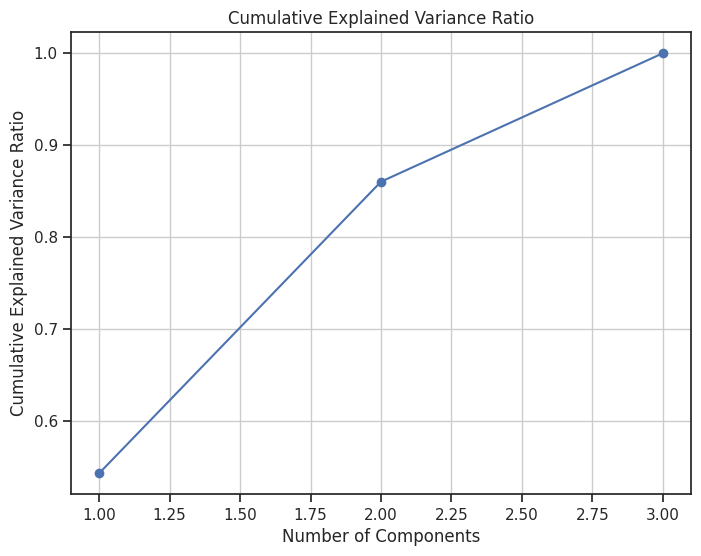

In [23]:
# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [24]:
#umap_df = pd.DataFrame(X_trans, columns = ["PC1", "PC2", "PC3"])
# Create a DataFrame for PCA results
umap_columns = [f'PC{i}' for i in range(1, num_components + 1)]
umap_df = pd.DataFrame(data=X_trans, columns=umap_columns)
umap_df

,PC1,PC2,PC3
0,12.782865,10.422302,15.717850
1,6.535879,11.848961,10.841872
2,11.135903,12.201023,15.080812
3,11.968140,11.849080,15.818028
4,7.261269,12.684509,11.979846
...,...,...,...
987,2.264955,5.375641,11.889647
988,2.743196,5.410077,12.317907
989,2.741600,5.586865,12.494994
990,1.337889,6.556873,10.938439


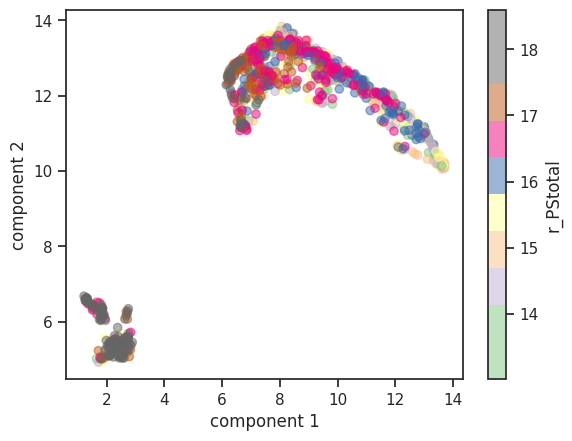

In [25]:
# Assuming umap_df is your DataFrame containing UMAP components and g_PStotal column
plt.scatter(umap_df["PC1"], umap_df["PC2"],
            c=df_cleanErr["r_PStotal"],  # Set color based on the values of "g_PStotal"
            alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label='r_PStotal')  # Set the label of the color bar to 'g_PStotal'
plt.show()

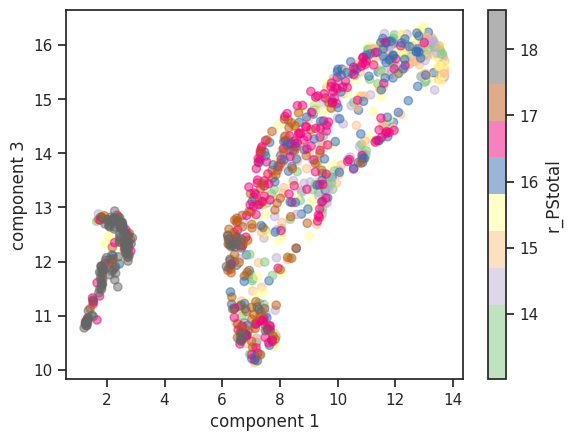

In [26]:
# Assuming umap_df is your DataFrame containing UMAP components and g_PStotal column
plt.scatter(umap_df["PC1"], umap_df["PC3"],
            c=df_cleanErr["r_PStotal"],  # Set color based on the values of "g_PStotal"
            alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 3')
plt.colorbar(label='r_PStotal')  # Set the label of the color bar to 'g_PStotal'
plt.show()

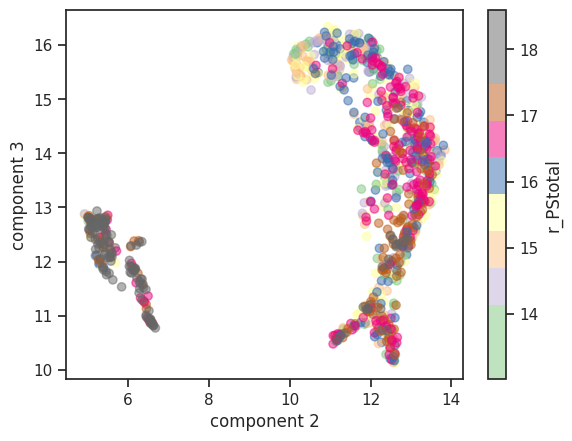

In [27]:
# Assuming umap_df is your DataFrame containing UMAP components and g_PStotal column
plt.scatter(umap_df["PC2"], umap_df["PC3"],
            c=df_cleanErr["r_PStotal"],  # Set color based on the values of "g_PStotal"
            alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 2')
plt.ylabel('component 3')
plt.colorbar(label='r_PStotal')  # Set the label of the color bar to 'g_PStotal'
plt.show()

## HDBSCAN 

#### Find the best parameters 

To find the best min_samples and min_cluster_size parameters for HDBSCAN, you typically perform a grid search over a range of values and evaluate the clustering performance using a metric such as silhouette score or another relevant metric.

Here's a general approach you can follow:

    Define a grid of parameters to search over for min_samples and min_cluster_size.
    For each combination of parameters:
        Fit HDBSCAN to your data.
        Evaluate the clustering performance using a metric such as silhouette score.
    Select the parameters that result in the highest clustering performance according to your chosen metric.

Here's how you can perform this grid search:

In [28]:

# Define the range of values for min_samples and min_cluster_size
min_samples_range = [5, 10, 15, 20, 25, 30, 35]  # Adjust as needed
min_cluster_size_range = [40, 50, 60, 80, 100, 120, 150]  # Adjust as needed

In [29]:
best_score = -1
best_params = {}


In [30]:
for min_samples in min_samples_range:
    for min_cluster_size in min_cluster_size_range:
        # Fit HDBSCAN with the current parameters
        clusterer_ = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size)
        labels = clusterer_.fit_predict(X_trans)  # X is your data
        
        # Evaluate clustering performance using silhouette score
        silhouette_ = silhouette_score(X_trans, labels)
        
        # Check if current parameters result in a better silhouette score
        if silhouette_ > best_score:
            best_score = silhouette_
            best_params['min_samples'] = min_samples
            best_params['min_cluster_size'] = min_cluster_size

In [31]:
print("Best parameters:", best_params)
print("Best silhouette score:", best_score)

Best parameters: {'min_samples': 5, 'min_cluster_size': 60}
Best silhouette score: 0.685939


### Applying HDBSCAN 

I foun that the best configurations of parameteres are 'min_samples': 5 and 'min_cluster_size': 60. 

In [76]:
clusterer = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=60, prediction_data=True, gen_min_span_tree=True)
#clusterer = hdbscan.HDBSCAN(min_cluster_size=40, min_samples=1, gen_min_span_tree=True)


In [77]:

clusterer.fit(X_trans)
labels = clusterer.labels_

In [78]:
clusterer.metric

'euclidean'

In [79]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_cluster0 = list(labels).count(0)
n_cluster1 = list(labels).count(1)
n_cluster2 = list(labels).count(2)
n_cluster3 = list(labels).count(3)
n_noise_ = list(labels).count(-1)


In [80]:
# Print parameters
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of cluster points 0: %d' % n_cluster0)
print('Estimated number of cluster points 1: %d' % n_cluster1)
print('Estimated number of cluster points 2: %d' % n_cluster2)
print('Estimated number of cluster points 3: %d' % n_cluster3)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of cluster points 0: 821
Estimated number of cluster points 1: 171
Estimated number of cluster points 2: 0
Estimated number of cluster points 3: 0
Estimated number of noise points: 0


/home/luisangel/luis-env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/luisangel/luis-env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot: >

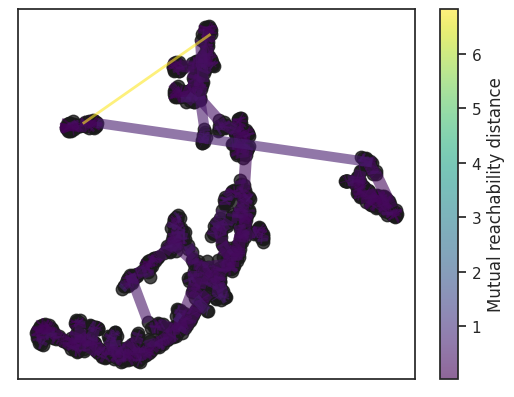

In [81]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)


### Build the cluster hierarchy 

<AxesSubplot: ylabel='distance'>

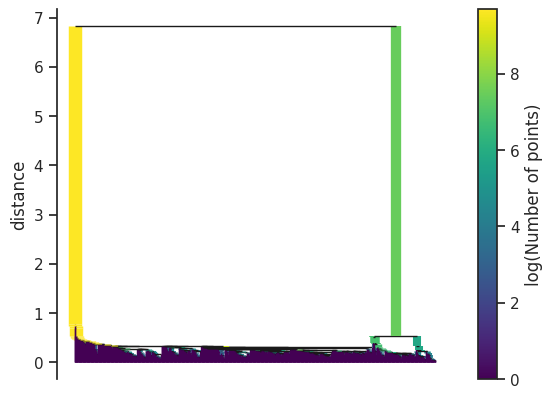

In [82]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

### Extract the clusters

<AxesSubplot: ylabel='$\\lambda$ value'>

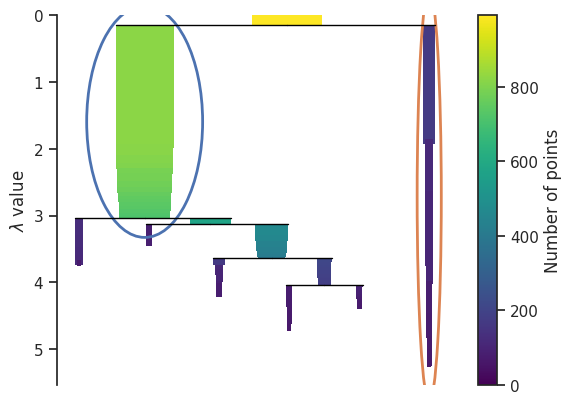

In [83]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

Plting the components

/home/luisangel/luis-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='PC1', ylabel='PC2'>

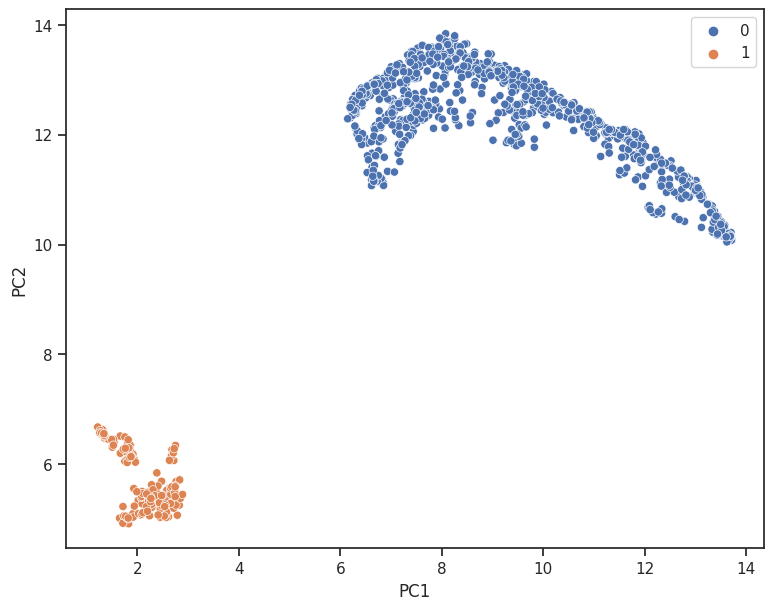

In [84]:
plt.figure(figsize=(9,7))
sns.scatterplot(umap_df["PC1"], umap_df["PC2"], 
                hue=labels,
                )

Create the tables for each clase

In [85]:
df_cleanErr["Label"] = labels

/tmp/ipykernel_1550512/341984377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleanErr["Label"] = labels


In [86]:
df_cleanErr

,Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,...,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf,Label
0,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0001534',151.228065,-24.565881,2768.8430,1194.1807,0.000344,1.109519,7.119020e-06,2.708475,...,0.045,16.612030,0.040,15.790031,0.034,14.886657,0.028,14.564144,0.031,0
1,b'HYDRA-0021',b'iDR4_3_HYDRA-0021_0019499',151.820602,-25.619486,1653.6090,3400.8994,0.000307,1.081890,2.490490e-05,2.232373,...,0.016,13.265827,0.014,13.113828,0.012,13.033432,0.020,13.019970,0.019,0
2,b'HYDRA-0023',b'iDR4_3_HYDRA-0023_0021195',154.612704,-25.530006,3569.1528,3993.6829,0.000317,0.949352,1.283758e-05,2.532320,...,0.011,15.336150,0.009,14.717150,0.007,14.074205,0.016,NaN,NaN,0
3,b'HYDRA-0026',b'iDR4_3_HYDRA-0026_0046098',158.459389,-24.620632,8485.7730,9943.1000,0.000367,1.218677,7.749229e-06,2.742691,...,NaN,NaN,NaN,15.129318,0.027,NaN,NaN,NaN,NaN,0
4,b'HYDRA-0031',b'iDR4_3_HYDRA-0031_0032774',150.917736,-26.667847,9368.1560,5633.4710,0.000384,1.078957,7.585842e-06,2.917582,...,0.022,15.775820,0.015,15.204820,0.023,15.071949,0.020,15.141534,0.030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,b'STRIPE82-0152',b'iDR4_3_STRIPE82-0152_0039867',345.965144,1.114263,4594.9390,8212.1100,0.000388,0.888920,1.353781e-06,3.503888,...,0.038,18.309921,0.029,18.402920,0.036,17.376879,0.019,17.614546,0.037,1
2621,b'STRIPE82-0153',b'iDR4_3_STRIPE82-0153_0010081',347.501701,-1.103308,3814.6055,2860.5464,0.000305,0.951453,1.120370e-06,3.440075,...,0.046,18.241900,0.043,18.198898,0.039,17.683357,0.021,17.860863,0.048,1
2623,b'STRIPE82-0154',b'iDR4_3_STRIPE82-0154_0021735',347.231197,0.618249,5584.9180,4965.4043,0.000322,0.998241,1.890625e-06,3.375813,...,0.064,17.711310,0.033,17.705309,0.035,17.292425,0.042,17.431017,0.035,1
2624,b'STRIPE82-0158',b'iDR4_3_STRIPE82-0158_0002490',349.427521,0.093123,9763.4440,1528.1051,0.000368,1.082996,2.030671e-06,4.099050,...,0.050,17.935234,0.046,18.010233,0.041,17.522295,0.025,16.980566,0.033,1


In [87]:
mask_0 = df_cleanErr["Label"] == 0
df_cleanErr_0 = df_cleanErr[mask_0]
df_cleanErr_0

,Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,...,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf,Label
0,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0001534',151.228065,-24.565881,2768.8430,1194.18070,0.000344,1.109519,0.000007,2.708475,...,0.045,16.612030,0.040,15.790031,0.034,14.886657,0.028,14.564144,0.031,0
1,b'HYDRA-0021',b'iDR4_3_HYDRA-0021_0019499',151.820602,-25.619486,1653.6090,3400.89940,0.000307,1.081890,0.000025,2.232373,...,0.016,13.265827,0.014,13.113828,0.012,13.033432,0.020,13.019970,0.019,0
2,b'HYDRA-0023',b'iDR4_3_HYDRA-0023_0021195',154.612704,-25.530006,3569.1528,3993.68290,0.000317,0.949352,0.000013,2.532320,...,0.011,15.336150,0.009,14.717150,0.007,14.074205,0.016,NaN,NaN,0
3,b'HYDRA-0026',b'iDR4_3_HYDRA-0026_0046098',158.459389,-24.620632,8485.7730,9943.10000,0.000367,1.218677,0.000008,2.742691,...,NaN,NaN,NaN,15.129318,0.027,NaN,NaN,NaN,NaN,0
4,b'HYDRA-0031',b'iDR4_3_HYDRA-0031_0032774',150.917736,-26.667847,9368.1560,5633.47100,0.000384,1.078957,0.000008,2.917582,...,0.022,15.775820,0.015,15.204820,0.023,15.071949,0.020,15.141534,0.030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543,b'STRIPE82-0099',b'iDR4_3_STRIPE82-0099_0020938',309.123648,-1.088714,4536.7007,2956.12740,0.000324,0.951544,0.000002,3.397798,...,0.018,17.338121,0.017,17.189121,0.015,17.399601,0.016,17.446985,0.027,0
2571,b'STRIPE82-0109',b'iDR4_3_STRIPE82-0109_0003174',316.598119,-1.316747,1998.4739,1463.07960,0.000427,0.977649,0.000003,3.554720,...,0.025,17.388048,0.024,17.247050,0.016,17.391690,0.014,17.448997,0.031,0
2574,b'STRIPE82-0111',b'iDR4_3_STRIPE82-0111_0000957',317.353957,-1.395179,6327.3900,949.99146,0.000369,1.126282,0.000002,3.538407,...,0.036,18.003386,0.034,17.864386,0.034,NaN,NaN,17.420252,0.040,0
2586,b'STRIPE82-0116',b'iDR4_3_STRIPE82-0116_0031873',320.351615,0.788286,5260.6030,6078.37600,0.000420,1.065187,0.000002,3.557154,...,0.038,17.422220,0.033,17.297220,0.023,17.437540,0.021,17.482317,0.045,0


In [88]:
# Gropu 1
mask_1 = df_cleanErr["Label"] == 1
df_cleanErr_1 = df_cleanErr[mask_1]
df_cleanErr_1

,Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,...,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf,Label
31,b'HYDRA-0058',b'iDR4_3_HYDRA-0058_0016259',165.072683,-29.866383,3178.8400,2857.1590,0.000304,0.943261,8.892940e-06,2.804344,...,0.012,15.554849,0.014,15.624849,0.016,15.760940,0.018,16.060038,0.021,1
47,b'HYDRA-0077',b'iDR4_3_HYDRA-0077_0083520',150.383353,-33.043261,5715.4970,9204.4120,0.000316,1.060488,6.278743e-06,2.746439,...,0.009,15.284123,0.011,15.138124,0.012,14.899714,0.009,15.156824,0.015,1
139,b'HYDRA-0130',b'iDR4_3_HYDRA-0130_0069791',152.726526,-41.830510,5225.5806,5577.5425,0.000350,1.049041,1.748245e-05,2.571128,...,0.008,13.397702,0.007,13.486292,0.009,13.621615,0.012,13.919579,0.016,1
162,b'HYDRA-0152',b'iDR4_3_HYDRA-0152_0125669',151.364903,-45.711517,3092.2058,6891.9740,0.000379,1.002329,6.115355e-06,3.033783,...,0.012,15.838723,0.014,15.783994,0.012,15.286293,0.011,15.234082,0.011,1
172,b'HYDRA-0161',b'iDR4_3_HYDRA-0161_0067703',152.558734,-47.531132,4041.3525,3860.0955,0.000436,1.006313,7.259066e-06,3.131480,...,0.011,15.076454,0.010,15.165944,0.009,15.333419,0.015,15.565096,0.017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,b'STRIPE82-0152',b'iDR4_3_STRIPE82-0152_0039867',345.965144,1.114263,4594.9390,8212.1100,0.000388,0.888920,1.353781e-06,3.503888,...,0.038,18.309921,0.029,18.402920,0.036,17.376879,0.019,17.614546,0.037,1
2621,b'STRIPE82-0153',b'iDR4_3_STRIPE82-0153_0010081',347.501701,-1.103308,3814.6055,2860.5464,0.000305,0.951453,1.120370e-06,3.440075,...,0.046,18.241900,0.043,18.198898,0.039,17.683357,0.021,17.860863,0.048,1
2623,b'STRIPE82-0154',b'iDR4_3_STRIPE82-0154_0021735',347.231197,0.618249,5584.9180,4965.4043,0.000322,0.998241,1.890625e-06,3.375813,...,0.064,17.711310,0.033,17.705309,0.035,17.292425,0.042,17.431017,0.035,1
2624,b'STRIPE82-0158',b'iDR4_3_STRIPE82-0158_0002490',349.427521,0.093123,9763.4440,1528.1051,0.000368,1.082996,2.030671e-06,4.099050,...,0.050,17.935234,0.046,18.010233,0.041,17.522295,0.025,16.980566,0.033,1


In [89]:
df_cleanErr_0.to_csv('../Class_allfilters_depth/Halpha_emitter_depth_group0.csv', index=False)
df_cleanErr_1.to_csv('../Class_allfilters_depth/Halpha_emitter_depth_group1.csv', index=False)